# Домашняя работа №2 и 3

## Непараметрические доверительные интервалы и гипотезы, ММП, критерии независимости


In [ ]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Задача 1 [3 балла].
У студента Такера К. прекрасный преподаватель истории, у которого есть одна удивительная особенность - он любит перед серьёзным разговором давать краткую историческую справку, буквально на 15 минут.
Ниже представлена длительность этих справок за последние 30 его бесед (в секундах).

Проверьте гипотезу о том, что средняя длительность исторической справки действительно составляет 15 минут.

Подсказка: если вы хотите пользоваться нормальностью данных, хорошо бы для начала это проверить.

In [ ]:
X = [ 972.13657796,  926.65790624,  974.6955699 ,  914.12313814,
       1010.54047579, 1049.17226689,  861.17140555, 1105.87821973,
       1069.02299022, 1070.14492318,  968.0794098 ,  979.37318679,
        967.76197371, 1034.4600697 ,  868.80697686,  796.73145929,
        964.73094116,  850.23223545,  926.94913049, 1070.79442272,
       1164.84056846,  915.00240153,  993.64009143, 1033.21118249,
       1081.99297917, 1133.70158858,  844.098831  , 1085.09613621,
       1008.30079651,  874.34433931]

Для решения задания воспользуемся Z-критерием для среднего. Он асимптотический и не требует проверки нормальности данных. Гипотеза $H_0$: $\mu = \mu_0 = 15 * 60$ (работать будем в секундах).

In [ ]:
from statsmodels.stats.weightstats import ztest
mu0 = 15 * 60
_, p_value = ztest(X, value=mu0)
print(f'Гипотеза H0 отвергается при любом уровне значимости alpha >= p_value = {p_value:.9f}')

Гипотеза H0 отвергается при любом уровне значимости alpha >= p_value = 0.000000869


### Задача 2 [2 балла].

> Помните, что для человека звук его имени является самым сладким и самым важным звуком человеческой речи. (Дейл Карнеги)

Доверяй, но проверяй. Решим задачку по психологии! Все цитаты в пабликах вконтакте делятся на два вида: мудрые и недостаточно мудрые. Если цитата мудрая, то её можно лайкнуть. Поговаривают, что если в цитате есть личные местоимения, то пользователь автоматически сопоставляет себя автору этой цитаты и вероятность того, что она будет лайкнута, повышается. Например, цитату

> Можно простить человеку все, кроме отсутствия. (Экзюпери)

мне не очень хотелось бы лайкать. А вот цитата

> Мне наплевать, что вы обо мне думаете. Я о вас вообще не думаю. (Булгаков)

совершенно другое дело.

В табличке `df_vk_wise` лежат данные о мудрых цитатах. В колонке `I` находится переменная, которая принимает значение `True`, когда в тексте цитаты было личное местоимение "Я".

Проверьте гипотезу о равенстве среднего числа лайков с помощью подходящего параметрического теста, затем с помощью бутстрапа. Как вы думаете, какой метод предпочтительнее в данной ситуации?

In [ ]:
df = pd.read_csv('df_vk_wise.csv')
df.head()

,likes,reposts,text,I
0,549,25,"Я, говорит, люблю человечество, но дивлюсь на ...",True
1,607,22,"Нельзя любить то, что я люблю, да ещё так, как...",True
2,914,37,Если испытываешь по-настоящему глубокое чувств...,False
3,989,34,"— Я тебя люблю, — сказал я. \n— Это пройдет, —...",True
4,1229,32,"Он очаровательно рассказывает мне о том, как о...",False


 Гипотеза  $H_0$: $\mu_1 = \mu_2$. Уровень значимости $\alpha = 0.05$.

Воспользуемся Z-критерием для разности средних (он асимтотический).

In [ ]:
alpha = 0.05

In [ ]:
X1 = df[df['I'] == True]['likes']
X2 = df[df['I'] == False]['likes']
_, p_value = ztest(X1, X2, value=0)

print(f'p_value = {p_value:.5f}')

if p_value > alpha:
    print(f'Гипотеза H0 не отвергается при уровне значимости {alpha}')
else:
    print(f'Гипотеза H0 отвергается при уровне значимости {alpha}')

p_value = 0.00727
Гипотеза H0 отвергается при уровне значимости 0.05


Сделаем бутстрап: генерируем подвыборки и посчитаем для них средние.

In [ ]:
from scipy.stats import bootstrap
n_resamples = 77777

X1_boot = bootstrap((X1,), np.mean, n_resamples=n_resamples, random_state=777).bootstrap_distribution
X2_boot = bootstrap((X2,), np.mean, n_resamples=n_resamples, random_state=777).bootstrap_distribution

Построим доверительный интервал Эфрона для разности средних.

In [ ]:
interval = np.quantile(X1_boot - X2_boot, alpha / 2), np.quantile(X1_boot - X2_boot, 1 - alpha / 2)
print(f'Разность средних попадает в интервал {interval} с вероятностью 0.95')

Разность средних попадает в интервал (25.75577668080332, 165.2168686453733) с вероятностью 0.95


В полученный доверительный интервал 0 не попал ⇒ на уровне значимости 0.05 гипотеза $H_0$ отвергается.

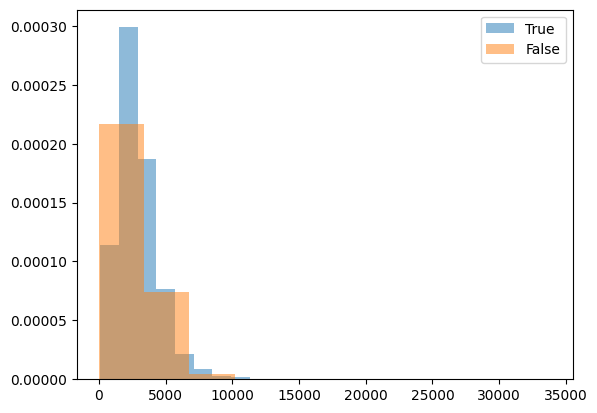

In [ ]:
plt.hist(X1, density=True, alpha=0.5, label='True')
plt.hist(X2, density=True, alpha=0.5, label='False')
plt.legend();

Заметим, что у наших распределений тяжелые хвосты. А как мы знаем корректности работы бутстрапу это не добавляет. Таким образом, вероятно, лучше использовать Z-критерий для разности средних.

### Задача 3 [3 балла].
Преподаватель по методам анализа данных не по своей воле решил усиленно заняться общей физической подготовкой. Он стал несколько раз в неделю бегать на длинные дистанции, чтобы тренировать выносливость, а для тренировки на силу - ходить на турник целый год каждый день. Ниже указаны данные по количеству выполненных подтягиваний.

Постройте доверительный интервал для медианы числа подтягиваний.

В занятиях по физической подготовке крайне важна регулярность. Не халтурить на упражнениях надо бы не "в среднем", а вообще, хотя бы 9 раз из 10. Постройте доверительный интервал для квантили соответствующего уровня.


In [ ]:
x = np.array([26,  8, 11,  7, 25,  7, 26,  0,  3,  6,  3,  3, 23,  6,  5, 25,  5,
        7,  1,  4, 23, 25, 24, 25, 26,  5, 21,  3, 20, 28, 20, 26,  3,  1,
       23, 15, 23, 29, 24, 28, 27, 14, 26, 30, 23, 25, 22,  1, 20, 29,  1,
        3,  5, 20, 20, 11,  4,  3, 19,  0, 27,  0, 26, 22, 25, 21, 25, 18,
       25, 10, 27, 14,  0, 20,  4,  7, 18, 22, 26, 28, 19,  2, 17, 20,  0,
       29, 24, 25, 23,  9, 20, 22, 12,  2, 24, 24, 29,  3, 15, 23, 26,  1,
       23, 29, 18, 24,  1,  1, 23,  9, 22, 21,  3,  0, 25,  1, 22,  9, 26,
        2, 11, 28,  2, 18, 26, 26,  1, 21, 15, 26,  5,  0, 25,  5,  5, 25,
       24,  2,  6, 26, 11, 25,  7,  8, 26, 11, 30,  6, 21,  5, 27, 29,  5,
       24, 24,  3, 14, 24, 26, 24, 25,  3,  7,  1,  8, 27,  2, 21, 21,  4,
       23,  2, 25, 11, 23, 28,  6,  8,  9, 21, 23, 26, 25, 22, 24, 24, 23,
       29, 23,  5, 10,  8,  3, 30,  0, 21,  2,  6,  8, 10, 14, 12, 27, 14,
       16,  3, 11, 26, 10, 13,  1, 27,  0, 19, 19, 20,  2, 23, 10, 21, 25,
       26,  8,  4,  2, 14,  4, 22, 23, 22,  7, 12, 26, 25, 14, 26, 22, 25,
       18, 12, 20, 22,  0,  2, 26, 22,  7, 21,  3, 28, 27,  2,  8,  3, 26,
        9, 27, 14, 16, 28, 23, 30,  7, 26, 18, 24,  3, 22, 21,  3, 13, 21,
       27,  9,  2, 20,  6,  6, 13, 17,  3,  8, 25, 12, 27,  8, 25, 21,  1,
       24, 24, 25,  2, 22, 27, 15, 24, 14,  2, 27, 17,  0, 23, 23, 24,  4,
        5,  6,  2,  3, 10, 24, 24,  8, 11, 20,  5, 28,  9, 17,  0, 23, 24,
       30,  5, 21, 23, 19, 25,  6,  0, 23, 21, 25, 28, 25, 22, 15, 27, 23,
       25, 10,  9,  5, 22, 19, 24, 21, 19,  5,  3, 11,  0,  5, 23, 23, 22,
       24, 16, 22, 20, 23, 26, 26,  1])


In [ ]:
n = x.shape[0]
alpha = 0.05

In [ ]:
from scipy import stats
quant = scipy.stats.norm.ppf(1 - alpha)

Читал про расчет доверительного интервала для медианы [отсюда](https://cyberleninka.ru/article/n/intervalnaya-otsenka-mediany-i-ee-avtomatizatsiya).

In [ ]:
x_sorted = np.sort(x)
index_left = int(n / 2 - quant * np.sqrt(n) / 2) - 1 # В конце вычитаем 1, т.к. у нас нумерация с 0
index_right = int(1 + n / 2 + quant * np.sqrt(n) / 2) - 1
interval = x_sorted[index_left], x_sorted[index_right]

print(f'Медиана попадает в интервал {interval} с вероятностью 0.95')

Медиана попадает в интервал (17, 21) с вероятностью 0.95


$\alpha$-квантиль - точка $x_\alpha$ такая, что: $P(X \le x_\alpha) \ge \alpha$ ⇔ $P(X \ge x_\alpha) \ge \ 1 - \alpha$. Т.е. если мы хотим, чтобы количество подтягиваний было не меньше, чем искомый квантиль с вероятностью 0.9, то нам надо найти 0.1-квантиль.

In [ ]:
res = stats.mstats.mquantiles_cimj(x, prob=0.1, alpha=alpha)
print(f'0.1-квантиль попадает в интервал {round(res[0][0], 2), round(res[1][0], 2)} с вероятностью 0.95')

0.1-квантиль попадает в интервал (1.22, 2.78) с вероятностью 0.95


### Задача 3.1 [1 балл].

Топ-3 ваших любимых фильмов (не сериалов). Про каждый кратко напишите чем он вам запал в душу.



1.   Вася не в себе ⟶ изначально меня привлекло название, а в итоге фильм понравился своей ироничностью и перевоспитанием главного героя.
2.   Холоп ⟶ просто весело, ненапряжно, прекрасный способ скоротать время и поулыбаться.
3.  Балканский рубеж ⟶ это прям наверное самый интересный из тех, что помню. Идеально иллюстрирует военные действия в Югославии и ту обстановку.


### Задача 4 [4 балла].
Приглашенный на Петербургский международный экономический форум Германом Грефом индийский мистик Садхгуру подарил Грефу древнюю шестигранную кость для принятия решений в сложных макроэкономических ситуациях. Служба безопасности Сбербанка (группа СКБ211 на семинаре 13.04.2024) провела серию из 50 испытаний и составила таблицу:
| Грань | 1 | 2 | 3 | 4 | 5 | 6 |
| --- | --- | --- | --- | --- | --- | --- |
| Число выпадений | 8 | 6 | 9 | 4 | 11 | 12 |

С помощью G-теста на уровне значимости 5% проверьте гипотезу о том, что
все грани равновероятны.

In [ ]:
from scipy.stats import power_divergence

alpha = 0.05

_, p_value = power_divergence(f_obs=[8, 6, 9, 4, 11, 12],
                 f_exp=[50 / 6] * 6,
                 lambda_='log-likelihood')

print(f'p_value = {p_value:.3f}')

if p_value > alpha:
    print(f'Гипотеза H0 не отвергается при уровне значимости {alpha}')
else:
    print(f'Гипотеза H0 отвергается при уровне значимости {alpha}')

p_value = 0.328
Гипотеза H0 не отвергается при уровне значимости 0.05


### Задача 5 [3 балла].
Сеть кинотеатров "Таро фильм" решила провести исследование в одном из своих заведений. В будний день сотрудники собрали данные о 600 совершеннолетних посетителях, для каждого человека известен жанр фильма, на который посетитель взял билет, а также покупал ли он пиво для приятного просмотра.
| Жанр фильма | Пиво закуплено | Без пива |
| --- | --- | --- |
| Экшн | 50 | 75 |
| Комедия | 125 | 175 |
| Семья | 90 | 30 |
| Ужасы | 45 | 10 |

С помощью критерия независимости хи-квадрат оцените взаимосвязь между жанром картины и тем покупают ли к просмотру ленты из данного жанра посетители пиво.

In [ ]:
_, p_value = power_divergence(f_obs=[8, 6, 9, 4, 11, 12],
                 f_exp=[50 / 6] * 6,
                 lambda_='pearson')

In [ ]:
from scipy.stats import chi2_contingency

table = np.array([[50, 75], [125, 175], [90, 30], [45, 10]])
res = chi2_contingency(table)
print(f'Гипотеза H0 отвергается при любом уровне значимости alpha >= p_value = {res.pvalue:.17f}')

Гипотеза H0 отвергается при любом уровне значимости alpha >= p_value = 0.00000000000004987


### Задача 6 [3 балла].

Студент Александр Т. утверждает, что ходит в кино в два раза чаще, чем на занятия по методам анализа данных, на занятия по методам анализа данных в два раза чаще, чем в спортзал. За последние полгода он 10 раз был в спортзале, 1 раз — на занятиях по методам анализа данных и 39 раз в кино. При помощи G-теста на уровне значимости 0.05 проверьте, правдоподобно ли утверждение Александра.


Пусть спортзал = x $\Rightarrow$ МАД = 2х $\Rightarrow$ кино = 4x $\Rightarrow$ x + 2x + 4x = 10 + 1 + 39

In [ ]:
x = 50 / 7

In [ ]:
alpha = 0.05

_, p_value = power_divergence(f_obs=[10, 1, 39],
                 f_exp=[x, 2 * x, 4 * x],
                 lambda_='log-likelihood')

print(f'p_value = {p_value:.8f}')

if p_value > alpha:
    print(f'Гипотеза H0 не отвергается при уровне значимости {alpha}')
else:
    print(f'Гипотеза H0 отвергается при уровне значимости {alpha}')

p_value = 0.00000265
Гипотеза H0 отвергается при уровне значимости 0.05


### Задача 6.1 [1 балл].

Напишите самый годный лично для вас лайфхак, можно и не один.



Чтобы быстро очистить яйца от скорлупы, надо поместить их перед чисткой в холодную воду.